# Part 1: Data Preprocessing

Dataset Link : https://www.kaggle.com/datasets/adammaus/predicting-churn-for-bank-customers


## Importing the libraries and dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
ds1 = pd.read_csv('/content/Churn_Modelling.csv')
ds1.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Data Exploration

In [ ]:
ds1.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
ds1.shape

(10000, 14)

In [ ]:
ds1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
ds1.select_dtypes(include='object').columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [ ]:
len(ds1.select_dtypes(include='object').columns)

3

In [ ]:
ds1.select_dtypes(include=['int64', 'float64']).columns

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [ ]:
len(ds1.select_dtypes(include=['int64', 'float64']).columns)

11

In [ ]:
#Statistical summary of the dataset
ds1.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Dealing with missing data

In [ ]:
ds1.isnull().values.any()

False

In [ ]:
ds1.isnull().values.sum()

0

## Encode categorical data

In [ ]:
ds1.select_dtypes(include='object').columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [ ]:
ds1.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
ds2 = ds1.drop(columns=['RowNumber', 'CustomerId', 'Surname'])
ds2.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
ds2.select_dtypes(include='object').columns

Index(['Geography', 'Gender'], dtype='object')

In [ ]:
ds2['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
ds2['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
ds3 = ds2.drop(columns=['Gender'])
ds3.groupby('Geography').mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Geography,,,,,,,,,
France,649.668329,38.511767,5.004587,62092.636516,1.530913,0.706621,0.516753,99899.180814,0.161548
Germany,651.453567,39.771622,5.009964,119730.116134,1.519729,0.713830,0.497409,101113.435102,0.324432
Spain,651.333872,38.890997,5.032297,61818.147763,1.539362,0.694792,0.529673,99440.572281,0.166734


In [ ]:
ds4 = ds2.drop(columns=['Geography'])
ds4.groupby('Gender').mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Gender,,,,,,,,,
Female,650.831389,39.238389,4.966102,75659.369139,1.544134,0.702619,0.502751,100601.541382,0.250715
Male,650.276892,38.658237,5.051677,77173.974506,1.518600,0.707898,0.525380,99664.576931,0.164559


In [ ]:
# one hot encoding
ds5 = pd.get_dummies(data=ds2, drop_first=True)
ds5.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


## Countplot

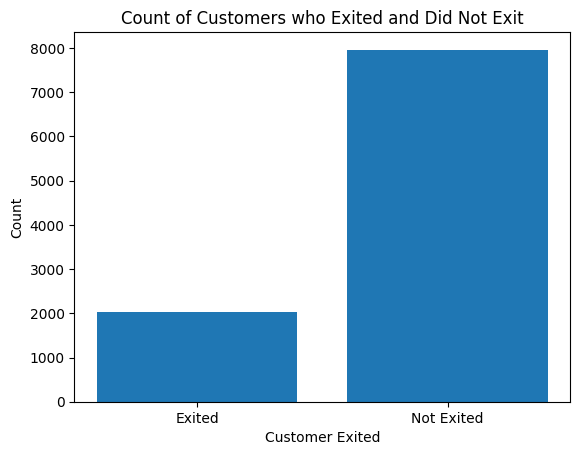

In [ ]:
# prompt: plot count of customer exited or not using matplotlib

import matplotlib.pyplot as plt

# Get the count of customers who exited and did not exit
exited_count = ds5[ds5['Exited'] == 1].shape[0]
not_exited_count = ds5[ds5['Exited'] == 0].shape[0]

# Create a bar chart
plt.bar(['Exited', 'Not Exited'], [exited_count, not_exited_count])

# Add labels and title
plt.xlabel('Customer Exited')
plt.ylabel('Count')
plt.title('Count of Customers who Exited and Did Not Exit')

# Show the plot
plt.show()


## Correlation Matrix & Heatmap

In [ ]:
ds6 = ds5.drop(columns='Exited')

<Axes: title={'center': 'Correlated with Exited'}>

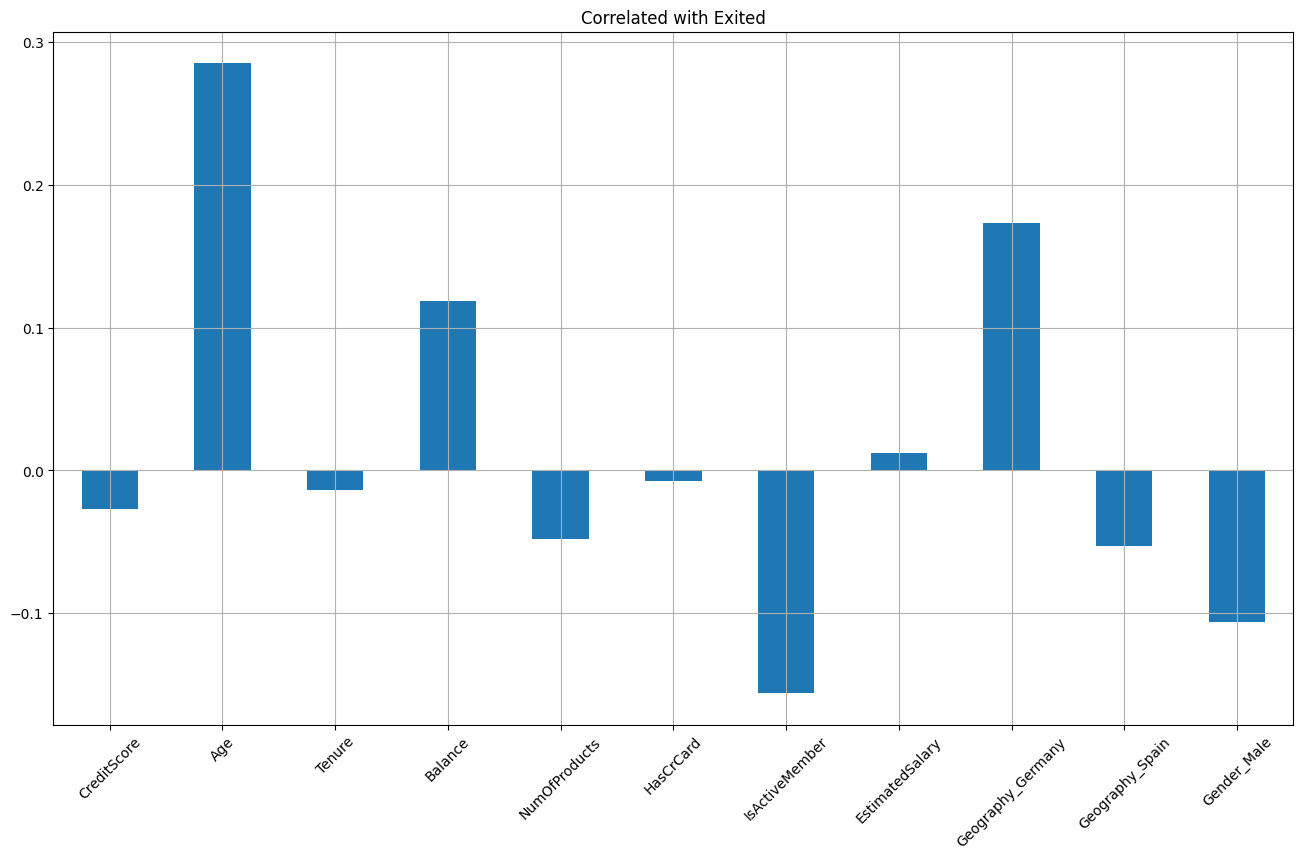

In [ ]:
ds6.corrwith(ds5['Exited']).plot.bar(
    figsize=(16,9), title='Correlated with Exited', rot=45, grid=True
)

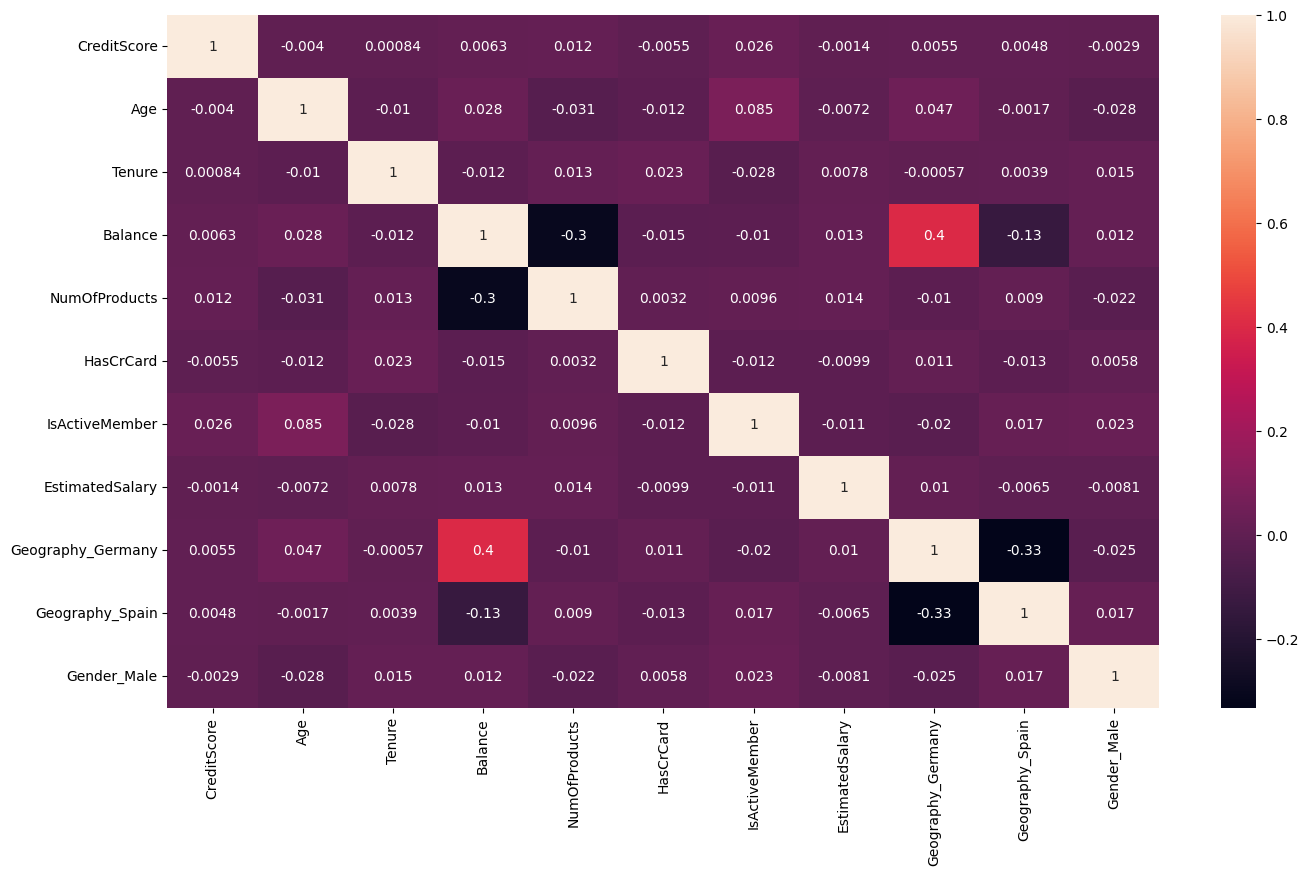

In [ ]:
# prompt: generate a heatmap

plt.figure(figsize=(16,9))
# Generate a heatmap
sns.heatmap(ds6.corr(), annot=True)
plt.show()


## Split the dataset

In [ ]:
ds6.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [ ]:
x = ds6
y = ds5['Exited']
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [ ]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [ ]:
# prompt: split into train and test

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [ ]:
# prompt: shape of x_train

print(x_train.shape)


(8000, 11)


In [ ]:
# prompt: shape of x_test, y_train, y_test

print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(2000, 11)
(8000,)
(2000,)


## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

In [ ]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [ ]:
x_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

# Part 2: Build the Model

## 1) Logistic Regression

In [ ]:
# prompt: code to build model with logistic regression

from sklearn.linear_model import LogisticRegression

classifier_lr = LogisticRegression(random_state=0)
classifier_lr.fit(x_train, y_train)


LogisticRegression(random_state=0)

In [ ]:
# prompt: check the score

print(classifier_lr.score(x_test, y_test))


0.811


In [ ]:
y_pred = classifier_lr.predict(x_test)

In [ ]:
# prompt: import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

from sklearn import metrics
accuracy_score = metrics.accuracy_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)
precision_score = metrics.precision_score(y_test, y_pred)
recall_score = metrics.recall_score(y_test, y_pred)
print("Accuracy Score:", accuracy_score)
print("Confusion Matrix:", confusion_matrix)
print("F1 Score:", f1_score)
print("Precision Score:", precision_score)
print("Recall Score:", recall_score)


Accuracy Score: 0.811
Confusion Matrix: [[1526   69]
 [ 309   96]]
F1 Score: 0.3368421052631579
Precision Score: 0.5818181818181818
Recall Score: 0.23703703703703705


In [ ]:
results = pd.DataFrame([['Logistic regression', accuracy_score, f1_score, precision_score, recall_score]],
                       columns=['Model','Accuracy','F1','precision', 'recall'])

In [ ]:
results

,Model,Accuracy,F1,precision,recall
0,Logistic regression,0.811,0.336842,0.581818,0.237037


In [ ]:
# prompt: code for confusion matrix

from sklearn.metrics import confusion_matrix

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print(cm)

# Get the accuracy score
accuracy_score = metrics.accuracy_score(y_test, y_pred)

# Print the accuracy score
print("Accuracy Score:", accuracy_score)


[[1526   69]
 [ 309   96]]
Accuracy Score: 0.811


In [ ]:
# prompt: cross validation

from sklearn.model_selection import cross_val_score
# Perform k-fold cross-validation with 10 folds
accuracies = cross_val_score(estimator=classifier_lr, X=x_train, y=y_train, cv=10)

# Calculate the average accuracy
average_accuracy = accuracies.mean()

# Print the average accuracy
print("Average Accuracy is {:.2f} %".format(average_accuracy*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))


Average Accuracy is 80.84 %
Standard Deviation is 0.88 %


## 2) Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=0)
classifier_rf.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
y_pred = classifier_rf.predict(x_test)

In [ ]:
# prompt: import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

from sklearn import metrics
accuracy_score = metrics.accuracy_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)
precision_score = metrics.precision_score(y_test, y_pred)
recall_score = metrics.recall_score(y_test, y_pred)
print("Accuracy Score:", accuracy_score)
print("Confusion Matrix:", confusion_matrix)
print("F1 Score:", f1_score)
print("Precision Score:", precision_score)
print("Recall Score:", recall_score)

model_results = pd.DataFrame([['Random forest', accuracy_score, f1_score, precision_score, recall_score]],
                       columns=['Model','Accuracy','F1','precision', 'recall'])

Accuracy Score: 0.8525
Confusion Matrix: [[1489  106]
 [ 189  216]]
F1 Score: 0.594222833562586
Precision Score: 0.6708074534161491
Recall Score: 0.5333333333333333


In [ ]:
df = pd.concat([results, model_results], ignore_index=True)
df

,Model,Accuracy,F1,precision,recall
0,Logistic regression,0.8110,0.336842,0.581818,0.237037
1,Random forest,0.8525,0.594223,0.670807,0.533333


In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1489  106]
 [ 189  216]]


### Cross Validation

In [ ]:
# prompt: cross validation

from sklearn.model_selection import cross_val_score
# Perform k-fold cross-validation with 10 folds
accuracies = cross_val_score(estimator=classifier_rf, X=x_train, y=y_train, cv=10)

# Calculate the average accuracy
average_accuracy = accuracies.mean()

# Print the average accuracy
print("Average Accuracy is {:.2f} %".format(average_accuracy*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

Average Accuracy is 85.96 %
Standard Deviation is 1.02 %


## 3) XGBoost

In [ ]:
from xgboost import XGBClassifier
classifier_xgb = XGBClassifier()
classifier_xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = classifier_xgb.predict(x_test)

In [ ]:
accuracy_score = metrics.accuracy_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)
precision_score = metrics.precision_score(y_test, y_pred)
recall_score = metrics.recall_score(y_test, y_pred)
print("Accuracy Score:", accuracy_score)
print("Confusion Matrix:", confusion_matrix)
print("F1 Score:", f1_score)
print("Precision Score:", precision_score)
print("Recall Score:", recall_score)

xgboost_results = pd.DataFrame([['XG Boost', accuracy_score, f1_score, precision_score, recall_score]],
                       columns=['Model','Accuracy','F1','precision', 'recall'])

df = pd.concat([df, xgboost_results], ignore_index=True)
df

Accuracy Score: 0.8525
Confusion Matrix: [[1489  106]
 [ 189  216]]
F1 Score: 0.594222833562586
Precision Score: 0.6708074534161491
Recall Score: 0.5333333333333333


,Model,Accuracy,F1,precision,recall
0,Logistic regression,0.8110,0.336842,0.581818,0.237037
1,Random forest,0.8525,0.594223,0.670807,0.533333
2,XG Boost,0.8525,0.594223,0.670807,0.533333


In [ ]:
# prompt: score for classifier_xgb

print(classifier_xgb.score(x_test, y_test))


0.8525


In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1489  106]
 [ 189  216]]


### Cross Validation

In [ ]:
accuracies = cross_val_score(estimator=classifier_xgb, X=x_train, y=y_train, cv=10)

# Calculate the average accuracy
average_accuracy = accuracies.mean()

# Print the average accuracy
print("Average Accuracy is {:.2f} %".format(average_accuracy*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

Average Accuracy is 85.12 %
Standard Deviation is 1.00 %


# Part 3: Randomized Search to find the best parameters(XGBoost Classifier

In [ ]:
# prompt: code for randomsearchcv for xgboost

import pandas as pd
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter grid
params = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
    'min_child_weight': [1, 3, 5, 7],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'n_estimators' : [100, 200, 500, 1000]
}

In [ ]:
# Initialize the RandomSearchCV object
random_search = RandomizedSearchCV(classifier_xgb, params, n_iter=10, scoring='accuracy', cv=5, verbose=3, random_state=42, n_jobs=-1)


In [ ]:
random_search.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.4, 0.5, 0.6, 0.7,
                                                             0.8, 0.9, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7],
                                        'n_estimators': [100, 200, 500, 1000],
                                        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9,
                                                      1.0]},
                   random_state=42, scoring='accuracy', verbose=3)

In [ ]:
random_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
random_search.best_params_

{'subsample': 0.7,
 'n_estimators': 1000,
 'min_child_weight': 7,
 'max_depth': 3,
 'learning_rate': 0.1,
 'colsample_bytree': 0.4}

In [ ]:
random_search.best_score_

0.8556250000000001

# Part 4: Final Model(XGBoost Classifier)

In [ ]:
from xgboost import XGBClassifier
classifier = XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=7, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=None)
classifier.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = classifier.predict(x_test)

accuracy_score = metrics.accuracy_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)
precision_score = metrics.precision_score(y_test, y_pred)
recall_score = metrics.recall_score(y_test, y_pred)

final_xgb = pd.DataFrame([['Final XG Boost', accuracy_score, f1_score, precision_score, recall_score]],
                       columns=['Model','Accuracy','F1','precision', 'recall'])

df = pd.concat([df, final_xgb], ignore_index=True)


In [ ]:
df

,Model,Accuracy,F1,precision,recall
0,Logistic regression,0.8110,0.336842,0.581818,0.237037
1,Random forest,0.8525,0.594223,0.670807,0.533333
2,XG Boost,0.8525,0.594223,0.670807,0.533333
3,XG Boost Random,0.8560,0.598886,0.686901,0.530864
4,Final XG Boost,0.8525,0.586255,0.678571,0.516049
